### Natural Language Generation (NLG) using Transformers is a cutting-edge approach that leverages deep learning models to generate human-like text. Transformers, particularly models like GPT (Generative Pre-trained Transformer), have revolutionized the field of NLG due to their ability to understand and generate coherent and contextually relevant text. Here's an overview of how this works:

#### Key Concepts in NLG with Transformers
### Transformer Architecture:

1. Attention Mechanism: The core innovation in Transformer models is the self-attention mechanism, which allows the model to weigh the importance of different words in a sequence when generating text.
2. Encoder-Decoder Structure: In sequence-to-sequence tasks (like translation), the encoder processes the input sequence, and the decoder generates the output sequence. However, models like GPT use a decoder-only architecture for generation tasks.
Pre-training and Fine-tuning:

3. Pre-training: The model is trained on a large corpus of text in an unsupervised manner. This involves tasks like predicting the next word in a sentence (language modeling), enabling the model to learn grammar, facts about the world, and some reasoning abilities.
4. Fine-tuning: The pre-trained model is then fine-tuned on a smaller, task-specific dataset with supervised learning. This step helps the model adapt its general language understanding to specific tasks such as text generation, summarization, or translation.


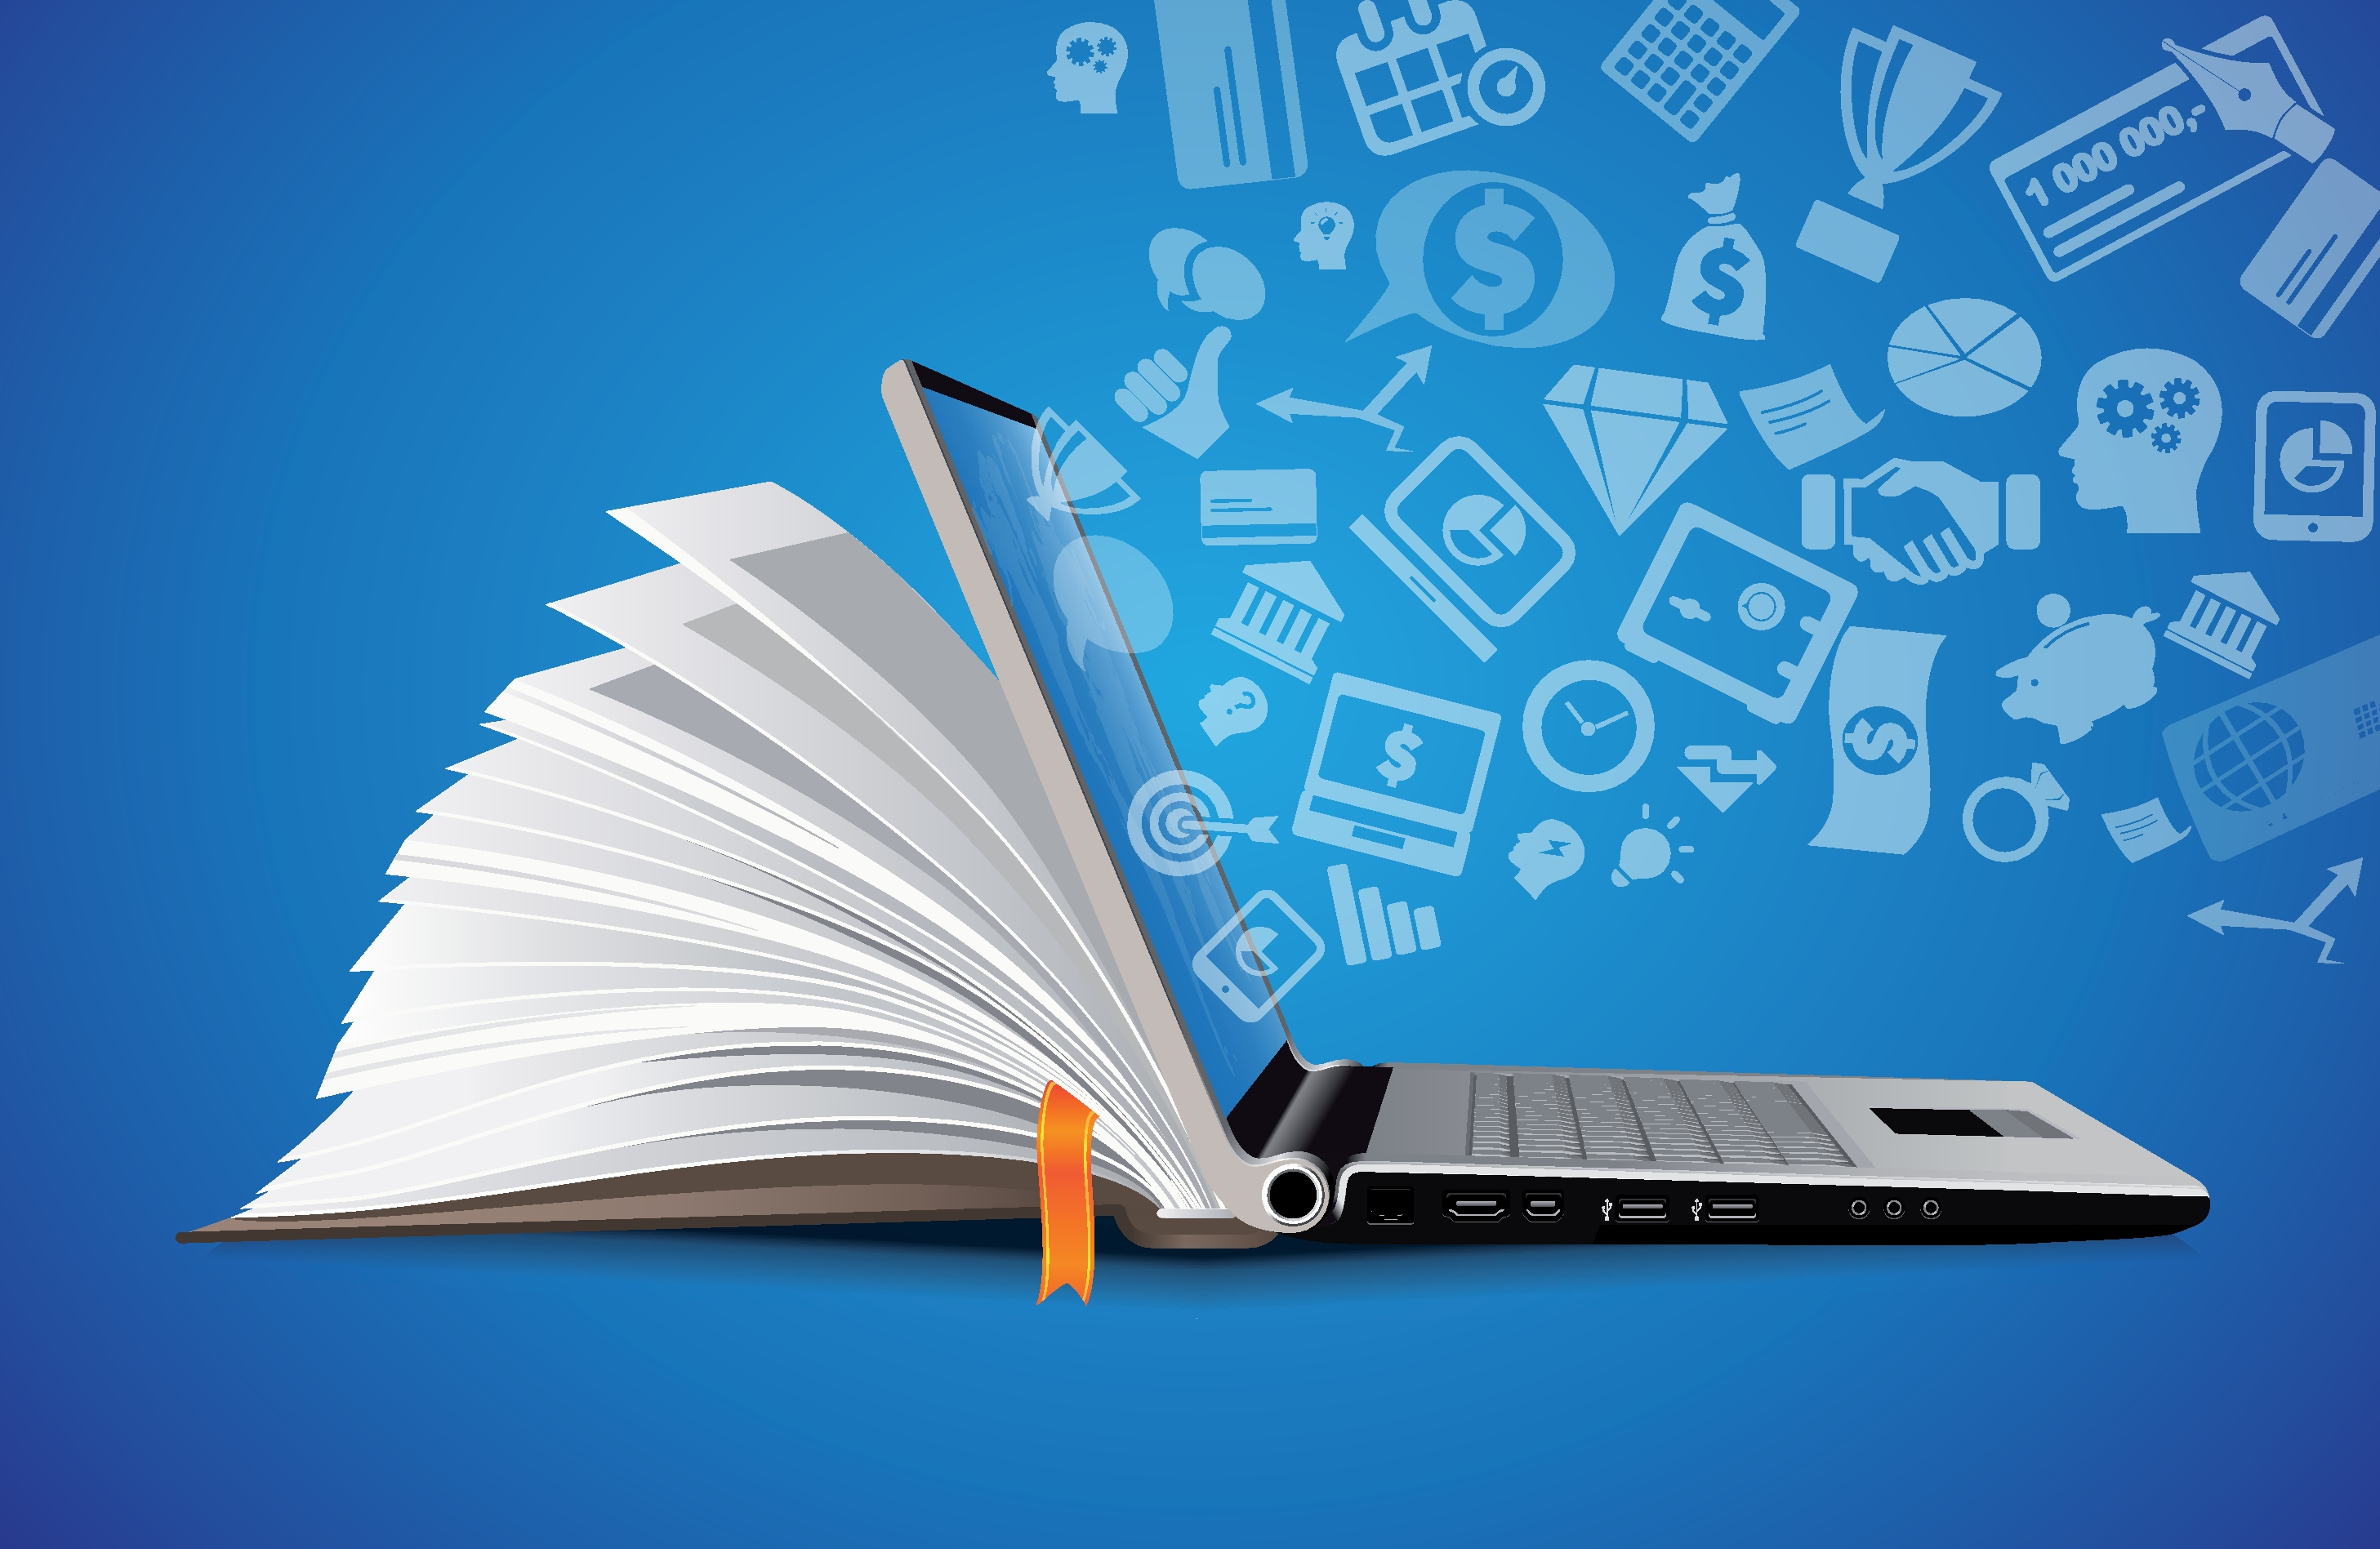
### Steps in Generating Text with Transformers
- Input Preparation:

Tokenize the input text using a tokenizer compatible with the pre-trained model (e.g., Byte Pair Encoding for GPT models).
Convert tokens to their corresponding numerical IDs.
- Text Generation:

- Greedy Search: Selects the word with the highest probability at each step. It's simple but can lead to less diverse and sometimes repetitive text.
- Beam Search: Keeps multiple hypotheses (beams) at each step and selects the best sequence overall. This improves diversity but is computationally expensive.
- Top-k Sampling: Selects the next word from the top-k most probable words, introducing randomness to generate more diverse text.
- Top-p (Nucleus) Sampling: Selects the next word from the smallest possible set of words whose cumulative probability exceeds a threshold p


### Role of pad_token_id
### Batch Processing:

- When processing multiple sequences at once, they need to be of the same length for efficient computation. Padding tokens are added to shorter sequences so they match the length of the longest sequence in the batch.
Preventing Model Errors:

- Models expect input sequences to be of uniform length. Without padding, shorter sequences can lead to dimension mismatches and errors during training or inference.
### Attention Masking:

- Padding tokens are often used in conjunction with attention masks. Attention masks inform the model which tokens are padding and should be ignored during computation, ensuring that padding tokens do not affect the model's predictions.
#### How pad_token_id is Used in Code
- When generating text, you can explicitly set the pad_token_id to ensure the model knows how to handle padding tokens correctly. This is particularly important for models like GPT-2, which do not use padding tokens by default.

In [5]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_text(input_text, model_name='gpt2', max_length=1024, num_beams=5, no_repeat_ngram_size=2, early_stopping=True):
    # Load pre-trained model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)
    
    # Set pad_token_id to eos_token_id because GPT2 does not have a pad_token_id
    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    # Encode input text and create attention mask
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    #attention_mask = input_ids.ne(tokenizer.pad_token_id).long()

    # Generate text
    output = model.generate(
        input_ids,
        #attention_mask=attention_mask,
        max_length=max_length,
        num_beams=num_beams,
        no_repeat_ngram_size=no_repeat_ngram_size,
        early_stopping=early_stopping,
        pad_token_id=tokenizer.eos_token_id  # Set pad token ID to EOS token ID
    )

    # Decode and print the output
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

input_text = "Once upon a time"
generated_text = generate_text(input_text)
print(generated_text)


Once upon a time, it was said, there was a man in the house of the Lord, and he said to him, "Lord, I have heard that there is a woman in this house. She is the daughter of Joseph." And Joseph said unto the woman, Behold, she is my wife.

And the man answered, Yea, but ye have not seen her, for she hath not come unto me. And he took her and put her in his hand and gave her to his servant, saying, Go and see her. Then he went and saw her; and when he had done so, he came to her with a great deal of sorrow. For he was afraid that she would not be able to bear him. So he brought her out of her house and went into her room, where she sat down on the bed and cried out, O Lord! I am the wife of my Lord Jesus Christ, the Son of God, who is in heaven and on earth. Amen.


## Create a Text Generation Model using ;GPT2, where input text should be given by the user. 

In [2]:
###### from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_text(input_text, model_name='gpt2', max_length=1000, num_beams=5, no_repeat_ngram_size=2, early_stopping=True):
    # Load pre-trained model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)
    
    # Set pad_token_id to eos_token_id because GPT2 does not have a pad_token_id
    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    # Encode input text and create attention mask
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    attention_mask = input_ids.ne(tokenizer.pad_token_id).long()

    # Generate text
    output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        num_beams=num_beams,
        no_repeat_ngram_size=no_repeat_ngram_size,
        early_stopping=early_stopping,
        pad_token_id=tokenizer.eos_token_id  # Set pad token ID to EOS token ID
    )

    # Decode and print the output
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Get user input
input_text = input("Enter the initial text: ")
model_name = input("Enter the model name (default 'gpt2'): ") or 'gpt2'
max_length = int(input("Enter the maximum length of generated text (default 100): ") or 100)
num_beams = int(input("Enter the number of beams for beam search (default 5): ") or 5)
no_repeat_ngram_size = int(input("Enter the no repeat n-gram size (default 2): ") or 2)
early_stopping = input("Enable early stopping? (default 'yes'): ").lower() in ['yes', 'y', '']

# Generate and print the text
generated_text = generate_text(
    input_text, 
    model_name=model_name, 
    max_length=max_length, 
    num_beams=num_beams, 
    no_repeat_ngram_size=no_repeat_ngram_size, 
    early_stopping=early_stopping
)
print("\nGenerated Text:\n")
print(generated_text)


Enter the initial text: Suyashi
Enter the model name (default 'gpt2'): gpt2
Enter the maximum length of generated text (default 100): 1000
Enter the number of beams for beam search (default 5): 4
Enter the no repeat n-gram size (default 2): 2
Enable early stopping? (default 'yes'): yes

Generated Text:

Suyashi, who is also the president of the National Association for the Advancement of Colored People (NAACP).

"I think it's important to recognize that there's a lot of work that needs to be done," he said. "We need to make sure that we don't let people of color get away with it. And I think that's what we're going to have to do."


## Beam search is a search algorithm that explores multiple possible sequences of words to generate the most likely text according to the model. Here's a brief explanation of how it works:

Beam Search
## Beam Search Algorithm:

- Beam Width (num_beams): This is the number of sequences (or beams) that the algorithm keeps track of at each step.
At each step, the algorithm considers all possible next words for each of the beams.
It then selects the top num_beams sequences based on their cumulative probability.
Benefits of Beam Search:

- Quality: Beam search typically generates higher-quality text compared to greedy search (which only keeps the most probable sequence at each step).
- Diversity: It balances between exploring different sequences and exploiting the most probable ones, leading to more coherent and diverse outputs.
Parameter (num_beams):

- Higher Values: Using a larger num_beams can improve the quality of generated text but increases computational complexity and runtime.
- Typical Values: Common values for num_beams range from 2 to 10, depending on the desired balance between quality and performance.

### N-gram in Text Generation
- An n-gram is a contiguous sequence of n items from a given sample of text or speech. In the context of text generation, n-grams are used to control repetition and improve the quality of generated text. Here’s a brief explanation:

N-gram Definition:

Unigram: Single word (n=1)
Bigram: Sequence of two words (n=2)
Trigram: Sequence of three words (n=3)
And so on...
No Repeat N-gram Size:

The no_repeat_ngram_size parameter ensures that n-grams of the specified size do not repeat in the generated text. For example, if no_repeat_ngram_size=2, the model avoids generating the same sequence of two words more than once.
This helps to reduce repetitive phrases and improve the diversity and coherence of the generated text.
Early Stopping in Beam Search
Early stopping in the context of beam search for text generation is a technique used to terminate the search early when certain conditions are met. This can help reduce computation time and improve efficiency. Here’s how it works:

### Early Stopping Definition:

- The early_stopping parameter, when set to True, enables the beam search to stop when the top beam (sequence) reaches the end-of-sequence token (eos_token). This means that once the most probable sequence has been fully generated, the search stops without considering further beams.
Benefit of Early Stopping:

Reduces unnecessary computation by stopping the search once a satisfactory sequence is found.
Prevents over-generation, where the model might continue generating tokens beyond the needed length.

## Example 2: Summary Generation 

In [6]:
from transformers import BartForConditionalGeneration, BartTokenizer

def summarize_article(title, article, model_name='facebook/bart-large-cnn', max_length=100, num_beams=5, no_repeat_ngram_size=2, early_stopping=True):
    # Load pre-trained model and tokenizer
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    # Encode input text
    inputs = tokenizer.encode(title + " " + article, return_tensors='pt', max_length=1024, truncation=True)

    # Generate summary
    summary_ids = model.generate(
        inputs,
        num_beams=num_beams,
        no_repeat_ngram_size=no_repeat_ngram_size,
        early_stopping=early_stopping,
        length_penalty=2.0,
        min_length=30,
        max_length=max_length,
        pad_token_id=tokenizer.eos_token_id
    )

    # Decode and print the output
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Get user input
title = input("Enter the title of the article: ")
article = input("Enter the content of the article: ")
model_name = input("Enter the model name (default 'facebook/bart-large-cnn'): ") or 'facebook/bart-large-cnn'
max_length = int(input("Enter the maximum length of the summary (default 100): ") or 100)
num_beams = int(input("Enter the number of beams for beam search (default 5): ") or 5)
no_repeat_ngram_size = int(input("Enter the no repeat n-gram size (default 2): ") or 2)
early_stopping = input("Enable early stopping? (default 'yes'): ").lower() in ['yes', 'y', '']

# Generate and print the summary
summary = summarize_article(
    title,
    article,
    model_name=model_name,
    max_length=max_length,
    num_beams=num_beams,
    no_repeat_ngram_size=no_repeat_ngram_size,
    early_stopping=early_stopping
)
print("\nSummary:\n")
print(summary)


Enter the title of the article: life
Enter the content of the article: A generative model is a type of machine learning model that is used to generate new data instances that are similar to those in a given dataset. It learns the underlying patterns and structures of the training data before generating fresh samples as compared to properties. Image synthesis, text generation, and music composition are all tasks that use generative models.   They are capable of capturing the features and complexity of the training data, allowing them to generate innovative and diverse outputs. Variational Autoencoders (VAEs), Generative Adversarial Networks (GANs), Autoregressive models, and Transformers are some examples of popular generative model architectures these models help to create new data that helps users in different aspects. These models have applications in creative activities, data enrichment, and difficult problem-solving in a variety of domains.
Enter the model name (default 'facebook/b